In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..','..','..','..','..')))
from Code import ScopeBO
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt
import matplotlib as mpl
import umap
from sklearn.preprocessing import scale
import random

# General plt parameters
plt.rcParams.update({
    "axes.titlesize": 20,        # Subplot title
    "axes.labelsize": 16,        # X and Y labels
    "figure.titlesize": 24,      # Suptitle
    "xtick.labelsize": 14,       # X tick labels
    "ytick.labelsize": 14,       # Y tick labels
    "legend.fontsize": 14,       # Legend text
    "legend.title_fontsize": 14  # Legend titles
})

## We generate datasets using different descriptors (DFT, Morfeus, Rdkit, Mordred). Let's first start with the DFT descriptors.

Import the descriptors for both substrate classes and generate the fully combinatorial scope

In [2]:
df_combinatorial = ScopeBO.create_reaction_space(
    reactants={"Data_For_Individual_Substrates/amide_dft_descr_amines.csv":"amine",
               "Data_For_Individual_Substrates/amide_dft_descr_acids.csv":"acid"}, 
               feature_processing=False, suggest_samples=False,
               filename="amide_fully_combinatorial_reaction_space.csv")
df_combinatorial

Generation of reaction space completed!
The search space has been saved in the file 'amide_fully_combinatorial_reaction_space.csv.'


,amine_E,amine_ES_root_dipole,amine_ES_root_electronic_spatial_extent,amine_ES_root_molar_volume,amine_E_scf,amine_E_thermal_correction,amine_E_zpe,amine_G,amine_G_thermal_correction,amine_H,...,acid_O2_ES_root_NPA_valence,acid_O2_Mulliken_charge,acid_O2_NMR_anisotropy,acid_O2_NMR_shift,acid_O2_NPA_Rydberg,acid_O2_NPA_charge,acid_O2_NPA_core,acid_O2_NPA_total,acid_O2_NPA_valence,acid_O2_VBur
C#CC(C)(C)N.CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,-250.099329,1.6240,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.694903,-0.194704,172.571034,146.000636,0.010347,-0.703152,1.999672,8.703152,6.693127,0.400812
C#CC(C)(C)N.CC(C(=O)O)c1ccc(CBr)cc1,-250.099329,1.6240,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.691840,-0.193912,174.585581,145.259768,0.010297,-0.701242,1.999671,8.701242,6.691268,0.392830
C#CC(C)(C)N.CC(C(=O)O)c1ccc(CC2CCCC2=O)cc1,-250.099329,1.6240,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.691327,-0.194431,175.233783,145.282640,0.010280,-0.701339,1.999671,8.701339,6.691385,0.391862
C#CC(C)(C)N.CC(C)(C(=O)O)c1ccccc1,-250.099329,1.6240,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.694158,-0.190902,164.611372,148.722432,0.010322,-0.704410,1.999671,8.704410,6.694416,0.439691
C#CC(C)(C)N.CC(C)(C)OC(=O)N1CC2(CC2)CC1C(=O)O,-250.099329,1.6240,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.717655,-0.195209,169.439075,150.302632,0.010466,-0.706136,1.999677,8.706136,6.695997,0.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nc1nccc(Cl)n1.O=C(O)c1ccco1,-778.633755,3.4408,1118.1743,843.856,-778.718761,0.091551,-778.640527,-778.672002,0.053304,-778.632811,...,6.612959,-0.195277,164.221845,159.385032,0.010084,-0.698188,1.999700,8.698188,6.688405,0.372388
Nc1nccc(Cl)n1.O=C(O)c1ccnc(C(F)(F)F)c1,-778.633755,3.4408,1118.1743,843.856,-778.718761,0.091551,-778.640527,-778.672002,0.053304,-778.632811,...,6.707898,-0.188382,161.610093,156.612592,0.009685,-0.699302,1.999690,8.699302,6.689922,0.387680
Nc1nccc(Cl)n1.O=C(O)c1ccncc1Cl,-778.633755,3.4408,1118.1743,843.856,-778.718761,0.091551,-778.640527,-778.672002,0.053304,-778.632811,...,6.700756,-0.178875,156.291415,148.425773,0.009916,-0.693026,1.999687,8.693026,6.683423,0.410526
Nc1nccc(Cl)n1.O=C(O)c1cnccn1,-778.633755,3.4408,1118.1743,843.856,-778.718761,0.091551,-778.640527,-778.672002,0.053304,-778.632811,...,6.683605,-0.167554,152.879709,152.776629,0.010193,-0.680458,1.999683,8.680458,6.670572,0.373191


Load the experimental dataset and the shared products of the selected conditions to reduce the generated substrate combinations to the ones that are actually in the envisioned dataset

In [3]:
# load the full experimental dataset
data = pd.read_csv("./../../amide_proc_experimental_data.csv",index_col=0, header=0)
print(f"The experimental dataset has {len(data)} experiments and "\
      f"{len(data['product_smiles'].unique())} different products.")
data.head(3)

The experimental dataset has 47015 experiments and 632 different products.


,idx,condition_id,sub_1_smiles,sub_2_smiles,product_smiles,Activation_ID,Additive_ID,Base_ID,solvent_id,yield,yield_clf,name0,archive,train_or_test,y_pred,condition_SMILES,text
0,15635,84,Cc1ccc(N)nc1,O=C(O)c1cc2ccccc2s1,Cc1ccc(NC(=O)c2cc3ccccc3s2)nc1,R2,A5,B1,S1,0.431730,1,22003-30-1-PL26-LC1-C84,2208_1,train,0.385567,CC(C)N=C=NC(C)C.C1=CC2=C(N=C1)N(N=N2)O.CN(C)C=O,Cc1ccc(N)nc1.O=C(O)c1cc2ccccc2s1.CC(C)N=C=NC(C...
1,4731,28,NCc1ccc(F)cc1F,O=C(O)c1ccco1,O=C(NCc1ccc(F)cc1F)c1ccco1,R8,A7,B7,S1,0.720284,1,22003-14-1-PL26-LC1-C28,2208_1,train,0.690787,CCN=C=NCCCN(C)C.Cl.C1=CC=C2C(=C1)C(=O)N(C2=O)O...,NCc1ccc(F)cc1F.O=C(O)c1ccco1.CCN=C=NCCCN(C)C.C...
2,22762,12,NCc1ccc(Cl)cc1,O=C(O)c1cccc(-c2ccccc2)c1,O=C(NCc1ccc(Cl)cc1)c1cccc(-c2ccccc2)c1,R19,A1,B7,S1,0.510634,1,22003-33-1-PL24-LC1-C12,2209_3,train,0.423631,[B-](F)(F)(F)F.CN(C)C(=[N+](C)C)ON1C(=O)CCC1=O...,NCc1ccc(Cl)cc1.O=C(O)c1cccc(-c2ccccc2)c1.[B-](...


In [4]:
# load the shared products of the selected conditions 
shared_prods = pd.read_csv("./../0_Descriptor_Generation/amide_smiles_products_filtered.csv",
                           names=["Products","Combinations"])
print(f"There are {len(shared_prods['Products'].unique())} shared products.")

# limit the experimental data to the ones for the shared products
shared_data = data.loc[data["product_smiles"].isin(shared_prods["Products"].to_list())]

# some reactions were carried out multiple times - average these values
match_columns = ["condition_id", "sub_1_smiles", "sub_2_smiles", "product_smiles",
                 "Activation_ID", "Additive_ID", "Base_ID", "solvent_id", "condition_SMILES"]
shared_data = shared_data.groupby(match_columns,as_index=False)["yield"].mean()

print(f"After filtering, there is experimental data for"\
      f" {len(shared_data['product_smiles'].unique())} products.")

# add a column for the substrate combinations
shared_data["Combination_Smiles"] = shared_data["sub_1_smiles"] + "." + shared_data["sub_2_smiles"]
shared_data.head(3)

There are 522 shared products.
After filtering, there is experimental data for 522 products.


,condition_id,sub_1_smiles,sub_2_smiles,product_smiles,Activation_ID,Additive_ID,Base_ID,solvent_id,condition_SMILES,yield,Combination_Smiles
0,1,COc1ccc(N)cn1,Cc1cc(C(=O)O)cc(Cl)n1,COc1ccc(NC(=O)c2cc(C)nc(Cl)c2)cn1,R1,A1,B7,S1,.CCN(C(C)C)C(C)C.CN(C)C=O,0.001679,COc1ccc(N)cn1.Cc1cc(C(=O)O)cc(Cl)n1
1,2,C#CC(C)(C)N,CC(C)(C(=O)O)c1ccccc1,C#CC(C)(C)NC(=O)C(C)(C)c1ccccc1,R13,A1,B7,S1,CN(C)C(=[N+](C)C)F.F[P-](F)(F)(F)(F)F.CCN(C(C)...,0.008784,C#CC(C)(C)N.CC(C)(C(=O)O)c1ccccc1
2,2,C#CC(C)(C)N,CCCCOc1ccc(C(=O)O)cc1,C#CC(C)(C)NC(=O)c1ccc(OCCCC)cc1,R13,A1,B7,S1,CN(C)C(=[N+](C)C)F.F[P-](F)(F)(F)(F)F.CCN(C(C)...,0.003263,C#CC(C)(C)N.CCCCOc1ccc(C(=O)O)cc1


In [5]:
# Filter the combinatorial reaction space to the experimentally evaluated reactions
df_filtered = df_combinatorial.loc[
    df_combinatorial.index.isin(shared_data["Combination_Smiles"].unique())]
print(f"After filtering, there are descriptors for {len(df_filtered.index.unique())} "\
      "unique substrate combinations.")
df_filtered.head(3)

After filtering, there are descriptors for 522 unique substrate combinations.


,amine_E,amine_ES_root_dipole,amine_ES_root_electronic_spatial_extent,amine_ES_root_molar_volume,amine_E_scf,amine_E_thermal_correction,amine_E_zpe,amine_G,amine_G_thermal_correction,amine_H,...,acid_O2_ES_root_NPA_valence,acid_O2_Mulliken_charge,acid_O2_NMR_anisotropy,acid_O2_NMR_shift,acid_O2_NPA_Rydberg,acid_O2_NPA_charge,acid_O2_NPA_core,acid_O2_NPA_total,acid_O2_NPA_valence,acid_O2_VBur
C#CC(C)(C)N.CC(C)(C(=O)O)c1ccccc1,-250.099329,1.624,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.694158,-0.190902,164.611372,148.722432,0.010322,-0.704410,1.999671,8.704410,6.694416,0.439691
C#CC(C)(C)N.CCCCOc1ccc(C(=O)O)cc1,-250.099329,1.624,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.705042,-0.204060,165.735838,159.511855,0.009604,-0.710204,1.999700,8.710204,6.700905,0.387553
C#CC(C)(C)N.Cc1ccc(F)cc1C(=O)O,-250.099329,1.624,605.4829,756.437,-250.235574,0.137539,-250.106642,-250.136756,0.100111,-250.098385,...,6.723692,-0.197783,166.488034,150.087141,0.009720,-0.707471,1.999690,8.707471,6.698052,0.401316


In [6]:
# Check the distribution of descriptors in the dataset before preprocessing
amine_features = [feature for feature in df_filtered.columns if "amine" in feature]
acid_features = [feature for feature in df_filtered.columns if "acid" in feature]
print(f"There are {len(acid_features)} acid features and {len(amine_features)} amine"\
      " features in the unprocessed dataset.")

There are 86 acid features and 38 amine features in the unprocessed dataset.


In [7]:
# variable for the conditons of interest
datasets = {"high": 20, "medium": 24, "low": 87}

In [8]:
# create_reaction_space() (function for preprocessing) needs a csv as input - needs to be generated
df_filtered.to_csv("preprocessing_dummy.csv", index = True, header = True)
# run the function to preprocess
df_processed = ScopeBO().create_reaction_space(reactants = ["preprocessing_dummy.csv"],
                                               feature_processing = True, suggest_samples=False,
                                               filename = "./Descriptors_For_Substrate_Combinations"\
                                                "/amide_processed_descr_dft_subs.csv")
print(f"There are {len(df_processed.columns)} features in the final datasets.")
df_processed = df_processed.sort_index() # sort to ensure consistent ordering between the different datasets
dfs_dset = {}
# assign the yields
for dset in datasets:
    cond_data = shared_data.loc[shared_data["condition_id"] == datasets[dset]]
    cond_data.set_index("Combination_Smiles",inplace=True)
    dfs_dset[dset] = df_processed.copy()
    dfs_dset[dset]["yield"] = dfs_dset[dset].index.map(cond_data["yield"])
    dfs_dset[dset].to_csv(f"./../amide_dset_dft_subs_{dset}-yielding.csv",index=True,header=True)
    print(f"Generated the '{dset}' dataset.")

Now doing feature preprocessing.
The following features were removed: ['amine_charge', 'acid_charge', 'amine_E_scf', 'amine_E_zpe', 'amine_G', 'amine_G_thermal_correction', 'amine_H', 'amine_H_thermal_correction', 'amine_electronic_spatial_extent', 'amine_number_of_atoms', 'amine_zero_point_correction', 'amine_N1_ES_root_NPA_total', 'amine_N1_ES_root_NPA_valence', 'amine_N1_NPA_total', 'amine_N1_NPA_valence', 'acid_E_scf', 'acid_E_zpe', 'acid_G', 'acid_G_thermal_correction', 'acid_H', 'acid_H_thermal_correction', 'acid_electronic_spatial_extent', 'acid_number_of_atoms', 'acid_zero_point_correction', 'acid_C1_ES_root_NPA_total', 'acid_C1_ES_root_NPA_valence', 'acid_C1_Mulliken_charge', 'acid_C1_NPA_charge', 'acid_C1_NPA_core', 'acid_C1_NPA_total', 'acid_C1_NPA_valence', 'acid_C2_ES_root_NPA_total', 'acid_C2_ES_root_NPA_valence', 'acid_C2_NPA_core', 'acid_C2_NPA_total', 'acid_C2_NPA_valence', 'acid_O1_APT_charge', 'acid_O1_ES_root_NPA_charge', 'acid_O1_ES_root_NPA_total', 'acid_O1_ES_roo

Check how many features below to the acid and how many to the bromide

In [9]:
acid_features = [feature for feature in df_processed.columns if "acid" in feature]
amine_features = [feature for feature in df_processed.columns if "amine" in feature]
print(f"There are {len(acid_features)} acid features and {len(amine_features)} amine"\
      " features in the dataset.")

There are 52 acid features and 24 amine features in the dataset.


Let's visualize the data distribution on a UMAP

Distribution of yields:


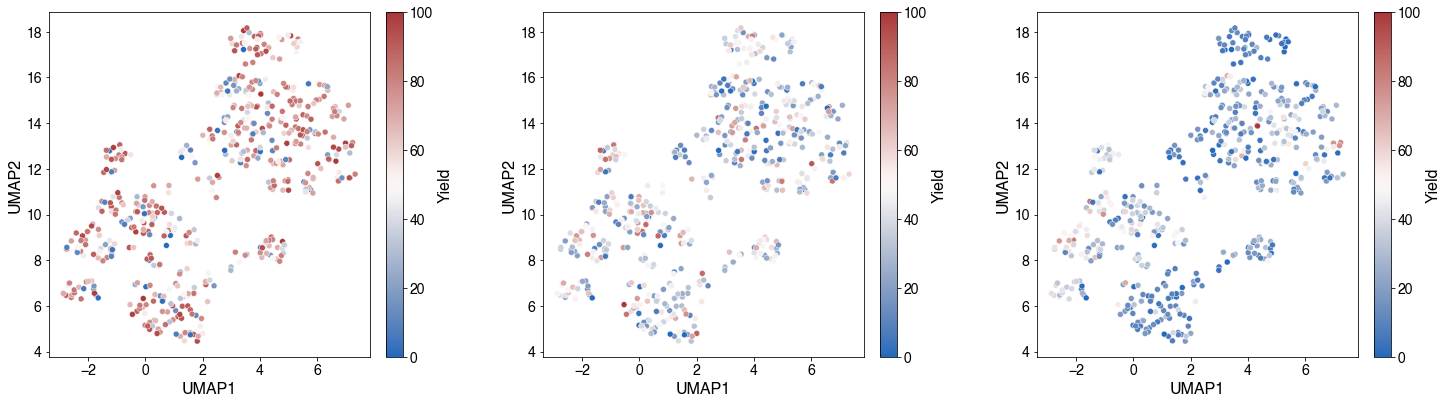

In [10]:
# Visualize the distribution
print("Distribution of yields:")
fig,axes = plt.subplots(1,3,figsize=(20,5.5),gridspec_kw={"wspace":0.1},constrained_layout=True)
for i,dset in enumerate(datasets):
    ax = axes[i]
    yield_list = dfs_dset[dset]["yield"].to_list()
    df_dset = dfs_dset[dset].drop(columns='yield')  # drop the objective values before the umap is generated
    df_dset = pd.DataFrame(scale(df_dset),df_dset.index,df_dset.columns)
    fit = umap.UMAP(n_neighbors=40,min_dist=0.6,n_components=2,metric="euclidean",random_state=42)
    df_umap = pd.DataFrame(fit.fit_transform(df_dset),df_dset.index,["UMAP1","UMAP2"])
    # map the yield data onto the UMAP
    df_umap["yield"] = yield_list
    sns.scatterplot(data=df_umap, x="UMAP1", y="UMAP2",hue="yield", 
                    palette="vlag", legend=False, ax = ax)
    df_umap.to_csv(f"./../umap_subs_{dset}.csv")

    # Add a colorbar for the yield
    norm = mpl.colors.Normalize(vmin=0, vmax=100)  # Normalize the colorscale
    sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
    sm.set_array([])  # Empty array for ScalarMappable
    cbar = fig.colorbar(sm, ax = ax)
    cbar.set_label('Yield')  # Label for the colorbar
plt.show()

The yield distributions on the UMAPs only show vague correlations between the position on the map and the yield, indicating that the datasets might be challenging to model.

# Do all the above also for the other featurizations

In [15]:
def generate_featurized_and_labelled_datasets(feat):
    print(f"Now working on {feat} featurization.")
    # All the steps involving the experimental HTE dataset can be skipped because the required variables have already been created.

    # Create the fully combinatorial dataframe (each amine * each acid)
    df_combinatorial = ScopeBO.create_reaction_space(
    reactants={f"Data_For_Individual_Substrates/amide_{feat}_descr_amines.csv":"amine",
               f"Data_For_Individual_Substrates/amide_{feat}_descr_acids.csv":"acid"}, 
               feature_processing=False, suggest_samples=False,
               filename="amide_fully_combinatorial_reaction_space.csv")
    
    # Filter to the combinations that exist in the selected experimental conditions
    df_filtered = df_combinatorial.loc[
        df_combinatorial.index.isin(shared_data["Combination_Smiles"].unique())]
    print(f"After filtering, there are descriptors for {len(df_filtered.index.unique())} "\
        "unique substrate combinations.")

    # create_reaction_space() (function for preprocessing) needs a csv as input - needs to be generated
    df_filtered.to_csv("preprocessing_dummy.csv", index = True, header = True)
    # run the function to preprocess
    df_processed = ScopeBO().create_reaction_space(reactants = ["preprocessing_dummy.csv"],
                                                feature_processing = True, suggest_samples=False,
                                                filename = f"./Descriptors_For_Substrate_Combinations"\
                                                    f"/amide_processed_descr_{feat}_subs.csv")
    print(f"There are {len(df_processed.columns)} features in the final datasets.")
    df_processed = df_processed.sort_index() # sort to ensure consistent ordering between the different datasets
    
    dfs_dset = {}
    # assign the yields
    for dset in datasets:
        cond_data = shared_data.loc[shared_data["condition_id"] == datasets[dset]]
        cond_data.set_index("Combination_Smiles",inplace=True)
        dfs_dset[dset] = df_processed.copy()
        dfs_dset[dset]["yield"] = dfs_dset[dset].index.map(cond_data["yield"])
        dfs_dset[dset].to_csv(f"./../amide_dset_{feat}_subs_{dset}-yielding.csv",index=True,header=True)
        print(f"Generated the '{dset}' dataset.")

    print(f"Finished dataset generation for {feat} featurization.\n")

    return dfs_dset

In [16]:
for feat in ["mordred","morfeus","rdkit"]:
    _ = generate_featurized_and_labelled_datasets(feat)

Now working on mordred featurization.
Generation of reaction space completed!
The search space has been saved in the file 'amide_fully_combinatorial_reaction_space.csv.'
After filtering, there are descriptors for 522 unique substrate combinations.
Now doing feature preprocessing.
The following features were removed: ['amine_nAcid', 'amine_nSpiro', 'amine_nBridgehead', 'amine_nB', 'amine_nP', 'amine_nI', 'amine_C4SP3', 'amine_NsLi', 'amine_NssBe', 'amine_NssssBe', 'amine_NssBH', 'amine_NsssB', 'amine_NssssB', 'amine_NdCH2', 'amine_NdsCH', 'amine_NddC', 'amine_NsNH3', 'amine_NssNH2', 'amine_NdNH', 'amine_NaaNH', 'amine_NtN', 'amine_NsssNH', 'amine_NdsN', 'amine_NssssN', 'amine_NsOH', 'amine_NsSiH3', 'amine_NssSiH2', 'amine_NsssSiH', 'amine_NssssSi', 'amine_NsPH2', 'amine_NssPH', 'amine_NsssP', 'amine_NdsssP', 'amine_NsssssP', 'amine_NsSH', 'amine_NdS', 'amine_NdssS', 'amine_NsGeH3', 'amine_NssGeH2', 'amine_NsssGeH', 'amine_NssssGe', 'amine_NsAsH2', 'amine_NssAsH', 'amine_NsssAs', 'amine_

In [17]:
# Clean up unnessary files
current_dir = os.getcwd()
for filename in os.listdir(current_dir):
    if "preprocessing" in filename or filename.startswith("amide_fully_combinatorial"):
        file_path = os.path.join(current_dir, filename)
        os.remove(file_path)
        print(f"Deleted: {filename}")

Deleted: preprocessing_dummy.csv
Deleted: amide_fully_combinatorial_reaction_space.csv
